## Задача классификации на примере определения
## для присланной научной статьи рубрики журнала.

Есть журнал трудов Крыловского научного центра https://transactions-ksrc.ru/ из области судостроения, авторы присылают свои научные статьи. Есть задачи по определению в какую рубрику отнести статью, а также определение ключевых слов по присланной статье в формате docx. В данном ноутбуке идет подготовка датасета и решение для задачи классификации.

Для запуска ноутбука следует начать с загрузки уже предварительно обработанных статей (строка articles = pd.read_csv('articles.csv'))


In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
from docx import Document
import pandas as pd
import os
import re
import nltk

print(tf.__version__)

2.0.0


In [2]:
#Preprocess function
def preprocess_text(text):
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

In [4]:
articles = pd.DataFrame(columns=['text', 'section'])
articles.head()

,text,section


In [2]:
mystem = Mystem() 
STOPWORDS= set(stopwords.words('russian') + stopwords.words('english'))
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [5]:
# Для обучения использую уже готовые статьи журнала, в которых есть лишняя информация,
# и которой точно нет в новых статьях
WORDS_TO_DEL = ['doi', 'удк', 'udc', 'теория корабля и строительная механика', 'naval architecture',
                'судовые энергетические установки и электроэнергетика', 'проектирование и конструкция судов', 
                'ship design and structure', 'физические поля корабля', 
                'ship powering and electric generation systems', 'другие вопросы морской техники', 
                'miscellaneous', 'ship signatures', 'cведения об авторах', 'about the authors', 'received',  
               'принята в печать']
#KEYW_P = ['Ключевые слова:', 'Keywords:']

In [7]:
# Для начала взял только 114 статей
articles = pd.DataFrame(columns=['text', 'section'])
for sect in range(1, 6):
    path = ('./word/'+str(sect)+'/')
    num = 0
    for filename in os.listdir(path):
        f = open(path + filename, 'rb')
        print(f)
        try:
            document = Document(f)
            text = ''
            keyw = ''
        
            for p in document.paragraphs:
                                    
                #print(p.text)
                if p.text ==None or p.text=="": 
                    pass
                elif any(kws in p.text.lower() for kws in KEYW_P):  
                    keyw += ' ' + p.text
                #elif  re.compile('|'.join(WORDS_TO_DEL),re.IGNORECASE).search(p.text):
                elif any(ele in p.text.lower() for ele in WORDS_TO_DEL):  #any(WORDS_TO_DEL) in p.text:
                    continue
                
                    
                else: 
                    text = text + ' ' + p.text
        except:
            pass
        #print(text)
        #text = text.replace(u'\xa0', u' ')
        #text = text.replace('\n', u' ')
        
        text = preprocess_text(text)
        #print(text)
        article = pd.DataFrame([[text, sect, keyw]], columns=['text', 'section', 'keywords'])
       
        articles = pd.concat([articles, article], ignore_index=False)
        num += 1
        #if num > 2:
            #f.close()
            #break
        f.close()
articles = articles.reset_index(drop=True)  
articles

<_io.BufferedReader name='./word/1/01_Вишневский_ВЕРСТКА.docx'>


NameError: name 'mystem' is not defined

In [3]:
articles = pd.read_csv('articles.csv')

In [4]:
vocab_size = 10000
embedding_dim = 256
max_length = 2000
trunc_type = 'post'
padding_type = 'post'
oov_tok = '#' # Символ для замены отсуттсвующих слов
#Create lemmatizer and stopwords list

training_portion = .8

In [5]:
articles['text'][0]
# посмотрим пример предварительно обработанной статьи

'л вишневский н половинкин р тогуняц фгуп крыловский государственный научный центр санкт петербург россия ао гипрорыбфлот санкт петербург россия винт изменять шаг основной результат направление исследование объект цель научный работа проводить обзор результат исследование получать последний год область нетрадиционный движитель винт изменять шаг материал метод использовать новый подход создание расчетный метод экспериментальный средство основной результат показывать многий случай применение движитель связанный изменение условие плавание судно мочь иметь преимущество традиционный движитель заключение представлять материал ориентировать исследователь продолжение работа позволять уточнять область использование данные движитель ключевой слово гребной винт винт изменять шаг динамический отключение лопасть ступица автор заявлять отсутствие возможный конфликт интерес l vishnevsky v polovinkin a togunyats krylov state research centre st petersburg russia jsc giprorybflot st petersburg russia ad

In [6]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [7]:
#tokenizer = nltk.RegexpTokenizer(r"[a-zа-яё]+")
# Удалим стоп слова
def remove_stopwords(text, num=max_length):
    text = ' '.join( [w for w in text.split() if (len(w)>2 and len(w)<20 and w not in STOPWORDS)] )
    '''
    tokens = tokenizer.tokenize(text)
    if len(tokens) > num:
        return tokens[:num]
    else:
        return ['#'] * (num - len(tokens)) +  tokens
    '''
    return(text)

remove_stopwords(articles.iloc[1]["text"])

'галушин сверчок чичерин фомичев щемелинин кок фгуп крыловский государственный научный центр санкт петербург россия navalprogetti триест италия гидродинамический характеристика судно искусственный каверна движение ограниченный фарватер объект цель научный работа объект исследование являться судно контейнеровоз внутренний плавание увеличивать коэффициент общий полнота главный размерение корпус судно удовлетворять требование эксплуатация западноевропейский внутренний водный путь цель работа состоять экспериментальный проверка эффективность применение искусственный каверна снижение гидродинамический сопротивление различный эксплуат ционный условие также определение влияние каверна характеристика маневренность управляемость материал метод численный моделирование оптимизация корпус судно экспериментальный данные модельный испытание получать опытов бассейн фгуп крыловский государственный научный центр основной результат результат исследовательский работа получать новый научный данные эффекти

In [8]:
# Соберу тексты и рубрики в отдельные списки
texts = []
target = []
for row in range(len(articles)):
    #text2tokens(articles.iloc[row]["text"])
    target.append(articles.iloc[row]["section"])
    texts.append(remove_stopwords(articles.iloc[row]["text"]))

In [9]:
texts[99]


'макаров рыжов научно инженерный центр электротехнический университет санкт петербург россия санкт петербургский государственный морской технический университет россия особенность гибридный метод расчет виброакустический характеристика инженерный конструкция объект цель научный работа объект работа являться виброакустический характеристика вах инженерный конструкция широкий диапазон частота цель являться выбор численный метод критерий максимальный соответствие расчетный экспериментальный данные область нижний верхний частота материал метод рассматриваться численный метод моделирование вах инженерный конструкция конечный элемент гибридный экспериментальный измерение вах проводиться малогабаритный бассейн натурный модель двухкорпусный конструкция основной результат результат исследование сделать вывод наиболее приемлемый получение достаточный скорость вычисление точность результат расчет вах широкий диапазон частота являться гибридный метод заключение применение гибридный метод моделиров

In [90]:
target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

Создание тестового и тренировочных датасетов

In [10]:
train_articles, validation_articles, train_labels, validation_labels = train_test_split(texts, target, train_size = training_portion,random_state=96622)
'''
train_articles = texts[0: train_size]
train_labels = labels[0: train_size]

validation_articles = texts[train_size:]
validation_labels = labels[train_size:]
'''
#print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

99
99
25
25


In [11]:
train_labels = np.array(train_labels) 
validation_labels = np.array(validation_labels) 
train_labels

array([1, 1, 2, 1, 4, 3, 1, 4, 3, 5, 3, 1, 4, 3, 5, 2, 3, 1, 4, 3, 4, 3,
       3, 5, 5, 5, 5, 1, 4, 1, 1, 3, 3, 5, 1, 3, 5, 4, 2, 5, 3, 1, 5, 2,
       3, 3, 3, 2, 5, 1, 4, 1, 1, 5, 1, 3, 3, 3, 1, 4, 2, 3, 1, 3, 1, 1,
       3, 3, 1, 1, 1, 1, 3, 4, 2, 1, 4, 4, 4, 3, 3, 1, 5, 1, 1, 1, 1, 3,
       1, 5, 3, 4, 2, 3, 5, 5, 4, 3, 5], dtype=int64)

In [13]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:20])
# Посмотрим список самых популярных слов

{'#': 1,
 'судно': 2,
 'который': 3,
 'russian': 4,
 'результат': 5,
 'значение': 6,
 'рис': 7,
 'работа': 8,
 'система': 9,
 'модель': 10,
 'суд': 11,
 'напряжение': 12,
 'условие': 13,
 'коэффициент': 14,
 'морской': 15,
 'метод': 16,
 'скорость': 17,
 'научный': 18,
 'krylov': 19,
 'являться': 20}

In [14]:
# После токенизации следует превратить токены в спикок последовательностей. Посмотрим чем стала 91 статья
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[90])

[2493, 4766, 2876, 746, 341, 619, 113, 50, 35, 18, 26, 73, 86, 56, 1901, 1234, 70, 398, 959, 198, 27, 98, 18, 8, 27, 8, 20, 398, 959, 198, 98, 534, 4819, 1, 1902, 268, 1336, 105, 70, 394, 417, 2070, 568, 82, 141, 375, 21, 16, 105, 21, 281, 8, 170, 529, 1716, 4980, 398, 959, 198, 417, 82, 640, 16, 1628, 93, 1628, 336, 42, 5, 2914, 776, 1234, 1901, 70, 394, 417, 2070, 568, 82, 141, 375, 43, 959, 1487, 791, 1116, 4240, 351, 916, 1788, 70, 3, 211, 1278, 67, 12, 141, 375, 600, 959, 1487, 791, 263, 318, 70, 58, 8112, 9474, 474, 417, 2070, 568, 82, 37, 384, 568, 1487, 198, 398, 396, 288, 673, 259, 33, 8214, 3356, 208, 2462, 415, 699, 4485, 1099, 4485, 146, 513, 217, 188, 518, 321, 2045, 4767, 2743, 1381, 806, 848, 19, 40, 29, 63, 52, 94, 8215, 273, 1769, 6783, 1469, 4108, 489, 282, 29, 244, 5382, 1, 1, 3234, 4108, 8215, 273, 1769, 1469, 1632, 501, 2125, 443, 2150, 181, 231, 1204, 379, 368, 4, 2105, 3452, 1579, 8215, 273, 1769, 501, 2125, 298, 250, 244, 2084, 1469, 6783, 4108, 2830, 1632, 273,

Для обучения нейронной сети требуется, чтобы последовательности имели одинаковый размер. Если статья длиннее max_length, статья будет обрезана. Если короче, будут добавлены токены #

In [17]:

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

2215
2000
2851
2000
1986
2000


In [109]:
print(train_padded[10])

[3047 3048 8432 ...  156  897   51]


In [22]:
train_labels

array([1, 1, 2, 1, 4, 3, 1, 4, 3, 5, 3, 1, 4, 3, 5, 2, 3, 1, 4, 3, 4, 3,
       3, 5, 5, 5, 5, 1, 4, 1, 1, 3, 3, 5, 1, 3, 5, 4, 2, 5, 3, 1, 5, 2,
       3, 3, 3, 2, 5, 1, 4, 1, 1, 5, 1, 3, 3, 3, 1, 4, 2, 3, 1, 3, 1, 1,
       3, 3, 1, 1, 1, 1, 3, 4, 2, 1, 4, 4, 4, 3, 3, 1, 5, 1, 1, 1, 1, 3,
       1, 5, 3, 4, 2, 3, 5, 5, 4, 3, 5], dtype=int64)

In [15]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

25
(25, 2000)


Попробуем восстановить статью после токенизации. 

In [18]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[90])

александров скворцов филиал цнии сэт фгуп крыловский государственный научный центр санкт петербург россия гребной электродвигатель переменный ток основа бесконтактный машина двойной питание объект цель научный работа объект работа являться частотный регулировать бесконтактный машина двойной питание мдп который мочь использоваться качество вариант гребной электродвигатель гэд цель работа заключаться выполнение расчет определение размер пакет статор ротор мдп также масса активный материал сравнительный оценка энергетический массогабаритный характеристика материал метод исходный материал являться научно технический информация посвящать исследование проектирование асинхронный машина фазный ротор число пар полюс особенность рассматривать мдп являться наличие конструкция дополнительный асинхронный машина фазный ротор число пар полюс располагать общий вал предназначать бесконтактный передача электроэнергия цепь обмотка ротор основной машина условие осуществление поставлять цель автор использо

## Построение LSTM модели

In [19]:
batch_size  = 16

In [20]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               1050624   
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1542      
Total params: 3,743,494
Trainable params: 3,743,494
Non-trainable params: 0
_________________________________________________________________


In [73]:
print(set(labels))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [75]:
train_padded

array([[1561, 3713, 2420, ..., 1097,  287,  418],
       [   1, 1366, 4072, ..., 1575, 2733, 2563],
       [1282, 4987,    1, ...,  539,   27,  992],
       ...,
       [1561,    1,    1, ...,  242, 1942,    4],
       [   1, 2802,  107, ...,    0,    0,    0],
       [   1,    1,    1, ...,    0,    0,    0]])

In [76]:
training_label_seq

array([list([258, 1999, 46, 4617, 325, 3069, 116, 59, 51, 23, 26, 85, 103, 80, 807, 6874, 85, 103, 80, 30, 1517, 766, 67, 10, 207, 39, 48, 136, 23, 13, 237, 1447, 10, 39, 29, 353, 429, 157, 3394, 102, 30, 1517, 766, 44, 15, 117, 154, 315, 141, 142, 15, 152, 216, 67, 10, 83, 1252, 95, 131, 102, 757, 144, 21, 656, 7, 58, 78, 1317, 686, 102, 302, 71, 44, 2139, 2705, 2706, 13, 69, 2923, 157, 52, 84, 102, 454, 465, 75, 30, 30, 1517, 766, 452, 3214, 118, 1253, 168, 532, 247, 214, 561, 371, 177, 1932, 31, 5026, 5, 6117, 20, 45, 28, 70, 37, 60, 104, 1518, 8064, 37, 60, 104, 2924, 3790, 635, 345, 255, 3, 6118, 1, 584, 513, 3, 311, 1, 28, 137, 266, 5500, 3395, 584, 4, 1048, 3215, 635, 13436, 226, 3, 195, 137, 250, 329, 292, 33, 2496, 674, 2140, 3, 733, 2141, 61, 435, 1, 1701, 195, 345, 255, 767, 329, 2275, 585, 855, 1, 2924, 3790, 635, 329, 8065, 8066, 313, 2, 3791, 1, 1161, 580, 6119, 1049, 635, 1780, 1933, 13437, 2497, 3215, 5501, 309, 137, 250, 1780, 808, 5, 5027, 18, 8067, 33, 2800, 61, 8068

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), batch_size = batch_size, verbose=2)

Train on 99 samples, validate on 25 samples
Epoch 1/10
99/99 - 94s - loss: 1.7590 - accuracy: 0.3434 - val_loss: 1.6565 - val_accuracy: 0.2400
Epoch 2/10
99/99 - 95s - loss: 1.5611 - accuracy: 0.4141 - val_loss: 1.6308 - val_accuracy: 0.1200
Epoch 3/10
99/99 - 125s - loss: 1.4153 - accuracy: 0.3838 - val_loss: 1.5857 - val_accuracy: 0.2400
Epoch 4/10
99/99 - 110s - loss: 1.1850 - accuracy: 0.6364 - val_loss: 1.4342 - val_accuracy: 0.5200
Epoch 5/10
99/99 - 111s - loss: 0.8972 - accuracy: 0.7576 - val_loss: 1.3880 - val_accuracy: 0.4400
Epoch 6/10
99/99 - 115s - loss: 0.6657 - accuracy: 0.7677 - val_loss: 1.5337 - val_accuracy: 0.4800
Epoch 7/10
99/99 - 106s - loss: 0.4262 - accuracy: 0.8586 - val_loss: 3.1128 - val_accuracy: 0.4800
Epoch 8/10
99/99 - 109s - loss: 0.6059 - accuracy: 0.7879 - val_loss: 1.8184 - val_accuracy: 0.4000
Epoch 9/10
99/99 - 104s - loss: 0.2701 - accuracy: 0.9091 - val_loss: 1.5459 - val_accuracy: 0.4800
Epoch 10/10
99/99 - 105s - loss: 0.1815 - accuracy: 0.9293

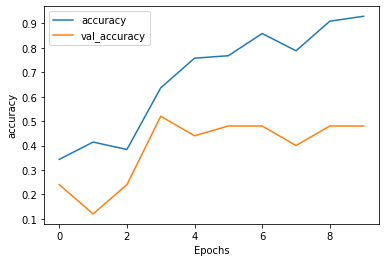

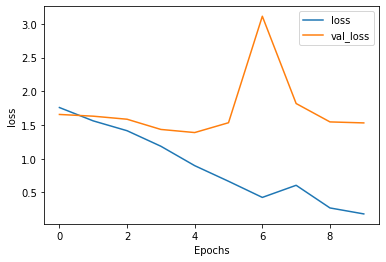

In [25]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Предыдущий результат: Плохая точность (30%) 
(сравнима со случайным отгадыванием с учетом дисбаланса) может возникнуть по разным причинам: 
Малое количество статей 
Несбалансированность рубрик — имеем большую первую рубрику.
Есть куда улучшать качество предварительной обработки текстов - там еще хватает мусора, не было борьбы с переносами, вместо переносов просто поставлен пробел.
Возможно есть куда улучшать модель, однако это успешная рабочая модель (90% при датасете из 2225 статей) для классификации текстов с bbc.


Текущий результат: 48%  . Значительно лучше.
    
Изменения: увеличено число статей с 114 до 124
Увеличено число стоп слов при подготовке датасета
Появился batch_size = 16, и увеличено число эпох с 4 до 10.
    
    